In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import re

In [87]:
ndurl = "https://raw.githubusercontent.com/kglan/MSDS/main/DATA608/Story5/1970-2021_DISASTERS.xlsx%20-%20emdat%20data.csv"
ndraw= pd.read_csv(ndurl)
ndraw = ndraw[ndraw['Disaster Subgroup'] != 'Biological']
ndraw = ndraw[ndraw['Disaster Type'] == 'Storm']
ndraw.head(10)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
6,1970-0058-BGD,1970,58,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
11,1970-0042-CAN,1970,42,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
14,1970-0090-CHN,1970,90,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Fran,...,7880.0,14000.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
22,1970-0118-CUB,1970,118,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
24,1970-0120-DMA,1970,120,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
31,1970-0121-GLP,1970,121,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
43,1971-0096-AUS,1971,96,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Althea,...,NaN,NaN,NaN,NaN,119219.0,15.645257,NaN,NaN,NaN,NaN


In [88]:
tempurl = "https://raw.githubusercontent.com/kglan/MSDS/main/DATA608/Story5/Climate%20Data.csv"
tempraw= pd.read_csv(tempurl)

# Replace '1-Jun' with '1979' in the 'Year' column
tempraw['Year'] = tempraw['Year'].replace('1-Jun', '1979')
tempraw = tempraw.dropna(subset=['Year'])
tempraw['Year'] = tempraw['Year'].astype(int)

tempraw.head(10)

,Year,Mo,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,...,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Troposphere
0,1978,12.0,-0.48,-0.51,-0.47,-0.44,-0.46,-0.42,-0.52,-0.62,...,-0.39,-0.68,-0.06,-0.45,-0.38,-0.49,-1.29,-1.15,-1.29,Lower
1,1979,1.0,-0.47,-0.64,-0.41,-0.64,-0.86,-0.50,-0.31,-0.13,...,-0.46,-0.95,0.10,-0.16,-0.15,-0.16,-3.22,-2.42,0.92,Lower
2,1979,2.0,-0.43,-0.56,-0.39,-0.47,-0.57,-0.41,-0.39,-0.53,...,-2.01,-2.30,-1.66,-0.80,-1.25,-0.58,-1.76,-1.84,-0.30,Lower
3,1979,3.0,-0.38,-0.51,-0.33,-0.46,-0.51,-0.44,-0.30,-0.53,...,-0.56,-0.47,-0.65,-0.52,-1.25,-0.18,-0.70,-0.39,0.23,Lower
4,1979,4.0,-0.40,-0.57,-0.34,-0.47,-0.62,-0.37,-0.34,-0.46,...,-0.84,-0.81,-0.88,-0.26,0.26,-0.51,-0.72,-0.46,-1.12,Lower
5,1979,5.0,-0.40,-0.56,-0.33,-0.52,-0.54,-0.52,-0.27,-0.62,...,-0.77,-0.56,-1.00,0.05,-0.42,0.27,-0.82,-0.75,-1.10,Lower
6,1979,6.0,-0.39,-0.61,-0.31,-0.50,-0.61,-0.44,-0.29,-0.62,...,-0.76,-1.14,-0.33,-0.98,-1.62,-0.67,-0.62,-0.67,-0.56,Lower
7,1979,7.0,-0.31,-0.57,-0.21,-0.21,-0.33,-0.14,-0.41,-1.11,...,-0.20,-0.38,0.01,-0.95,-2.18,-0.37,-0.16,-0.09,-1.16,Lower
8,1979,8.0,-0.40,-0.54,-0.35,-0.34,-0.37,-0.32,-0.46,-0.91,...,-0.26,-0.35,-0.15,-1.00,-1.67,-0.69,-0.74,-0.36,-1.05,Lower
9,1979,9.0,-0.32,-0.44,-0.28,-0.33,-0.31,-0.34,-0.32,-0.73,...,-0.18,-0.02,-0.35,-0.11,-0.65,0.15,0.61,0.68,-0.76,Lower


In [89]:
tempraw.dtypes

Year             int32
Mo             float64
Globe          float64
Land           float64
Ocean          float64
NH             float64
Land.1         float64
Ocean.1        float64
SH             float64
Land.2         float64
Ocean.2        float64
Trpcs          float64
Land.3         float64
Ocean.3        float64
NoExt          float64
Land.4         float64
Ocean.4        float64
SoExt          float64
Land.5         float64
Ocean.5        float64
NoPol          float64
Land.6         float64
Ocean.6        float64
SoPol          float64
Land.7         float64
Ocean.7        float64
USA48          float64
USA49          float64
AUST           float64
Troposphere     object
dtype: object

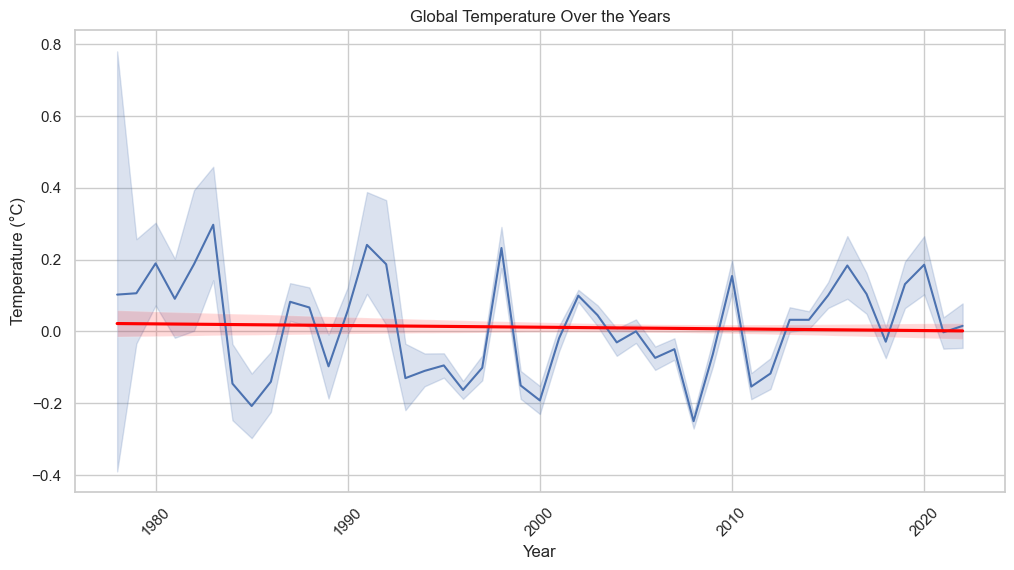

In [90]:
# Create a line plot for the 'Globe' temperature over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=tempraw, x='Year', y='Globe')
sns.regplot(data=tempraw, x='Year', y='Globe', scatter=False, color='red')
plt.title('Global Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [91]:
temp = tempraw[(tempraw['Year'] >= 1997) & (tempraw['Year'] <= 2022)]

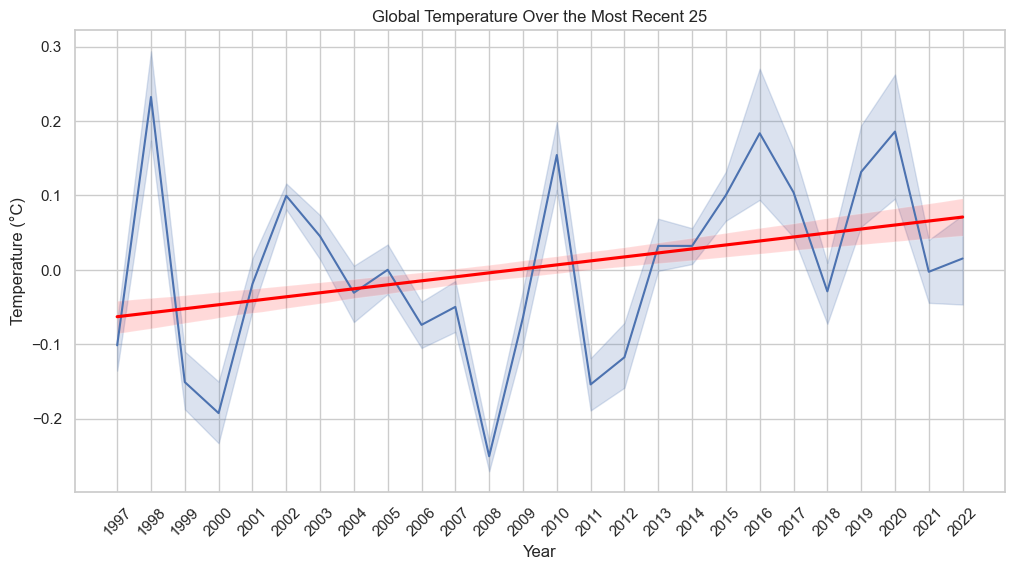

In [92]:
# Create a line plot for the 'Globe' temperature over the most recent 25 years
plt.figure(figsize=(12, 6))
sns.lineplot(data=temp, x='Year', y='Globe')
sns.regplot(data=temp, x='Year', y='Globe', scatter=False, color='red')  # Add a trendline
plt.title('Global Temperature Over the Most Recent 25')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)

# Set the x-axis ticks to whole numbers
plt.xticks(range(int(temp['Year'].min()), int(temp['Year'].max()) + 1), rotation=45)

# Show the plot
plt.show()


In [93]:
ndraw.head(10)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
6,1970-0058-BGD,1970,58,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
11,1970-0042-CAN,1970,42,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
14,1970-0090-CHN,1970,90,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Fran,...,7880.0,14000.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
22,1970-0118-CUB,1970,118,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
24,1970-0120-DMA,1970,120,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
31,1970-0121-GLP,1970,121,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
43,1971-0096-AUS,1971,96,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Althea,...,NaN,NaN,NaN,NaN,119219.0,15.645257,NaN,NaN,NaN,NaN


In [94]:
# Assuming 'nd' is your DataFrame
unique_subtypes = nd['Disaster Type'].unique()

# Print the unique values
print(unique_subtypes)

['Flood' 'Earthquake' 'Storm' 'Landslide' 'Drought' 'Wildfire'
 'Extreme temperature ' 'Volcanic activity' 'Mass movement (dry)' 'Impact'
 'Glacial lake outburst']


In [95]:
# Assuming 'nd' is your DataFrame
unique_subtypes = nd['Disaster Subtype'].unique()

# Print the unique values
print(unique_subtypes)

['Riverine flood' 'Ground movement' 'Tropical cyclone' nan
 'Convective storm' 'Avalanche' 'Drought' 'Coastal flood'
 'Land fire (Brush, Bush, Pasture)' 'Flash flood' 'Cold wave'
 'Forest fire' 'Landslide' 'Heat wave' 'Ash fall' 'Mudslide'
 'Extra-tropical storm' 'Tsunami' 'Subsidence' 'Severe winter conditions'
 'Rockfall' 'Lava flow' 'Pyroclastic flow ']


In [96]:
# Assuming 'nd' is your DataFrame
unique_subtypes = nd['Disaster Subsubtype'].unique()

# Print the unique values
print(unique_subtypes)


[nan 'Lightning/Thunderstorms' 'Tornado' 'Winter storm/Blizzard'
 'Severe storm' 'Sand/Dust storm' 'Hail' 'Sudden subsidence' 'Snow/Ice'
 'Rain' 'Storm/Surge' 'Derecho']


In [97]:
unique_disaster_groups = ndraw['Disaster Subgroup'].unique()
print(unique_disaster_groups)


['Meteorological']


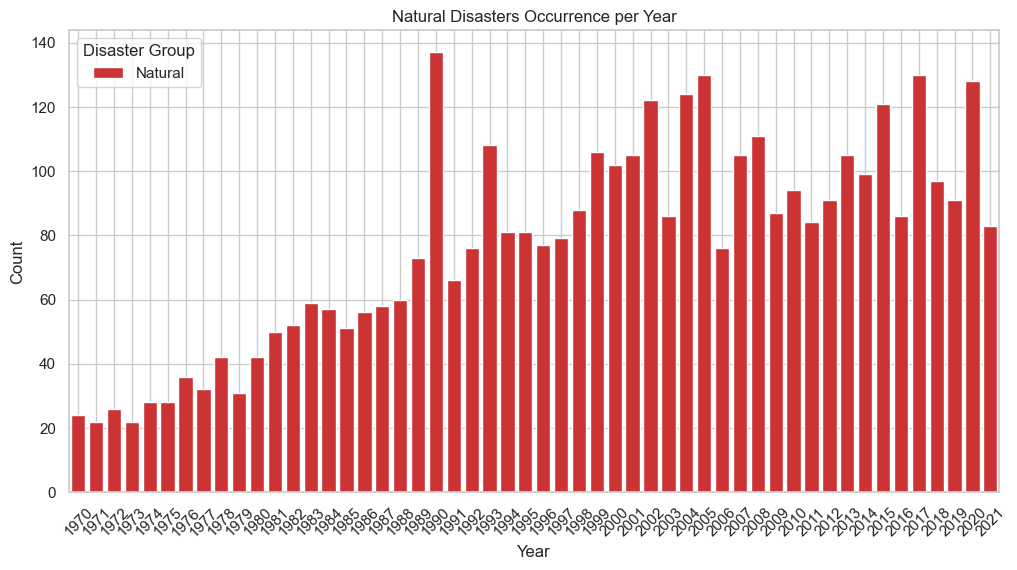

In [98]:
# Sample data and plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=ndraw, x='Year', hue='Disaster Group', palette='Set1')
plt.title('Natural Disasters Occurrence per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Disaster Group')
plt.grid(True)

# Show the plot
plt.show()

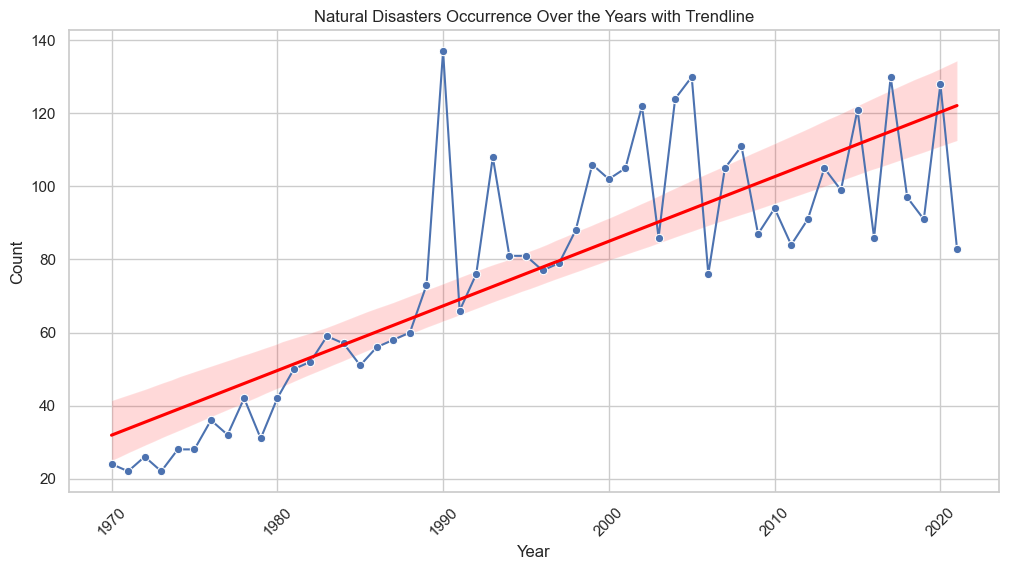

In [99]:
# Aggregate the counts of disasters per year
disaster_counts = ndraw.groupby('Year')['Disaster Group'].count().reset_index()

# Sample data and plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=disaster_counts, x='Year', y='Disaster Group', marker='o')
sns.regplot(data=disaster_counts, x='Year', y='Disaster Group', scatter=False, color='red')  # Add a trendline
plt.title('Natural Disasters Occurrence Over the Years with Trendline')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [100]:
ndraw.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

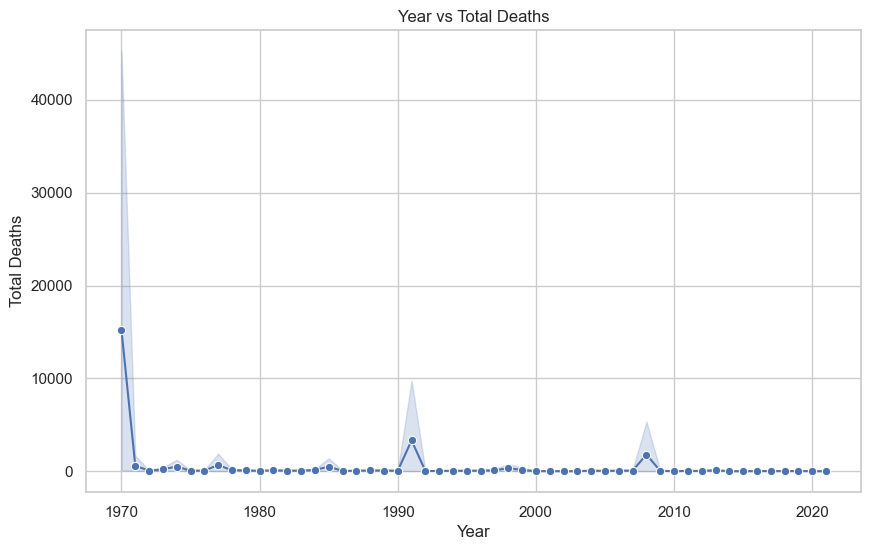

In [101]:
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total Deaths', data=ndraw, marker='o', color='b')

# Set plot title and axis labels
plt.title('Year vs Total Deaths')
plt.xlabel('Year')
plt.ylabel('Total Deaths')

# Display the plot
plt.show()

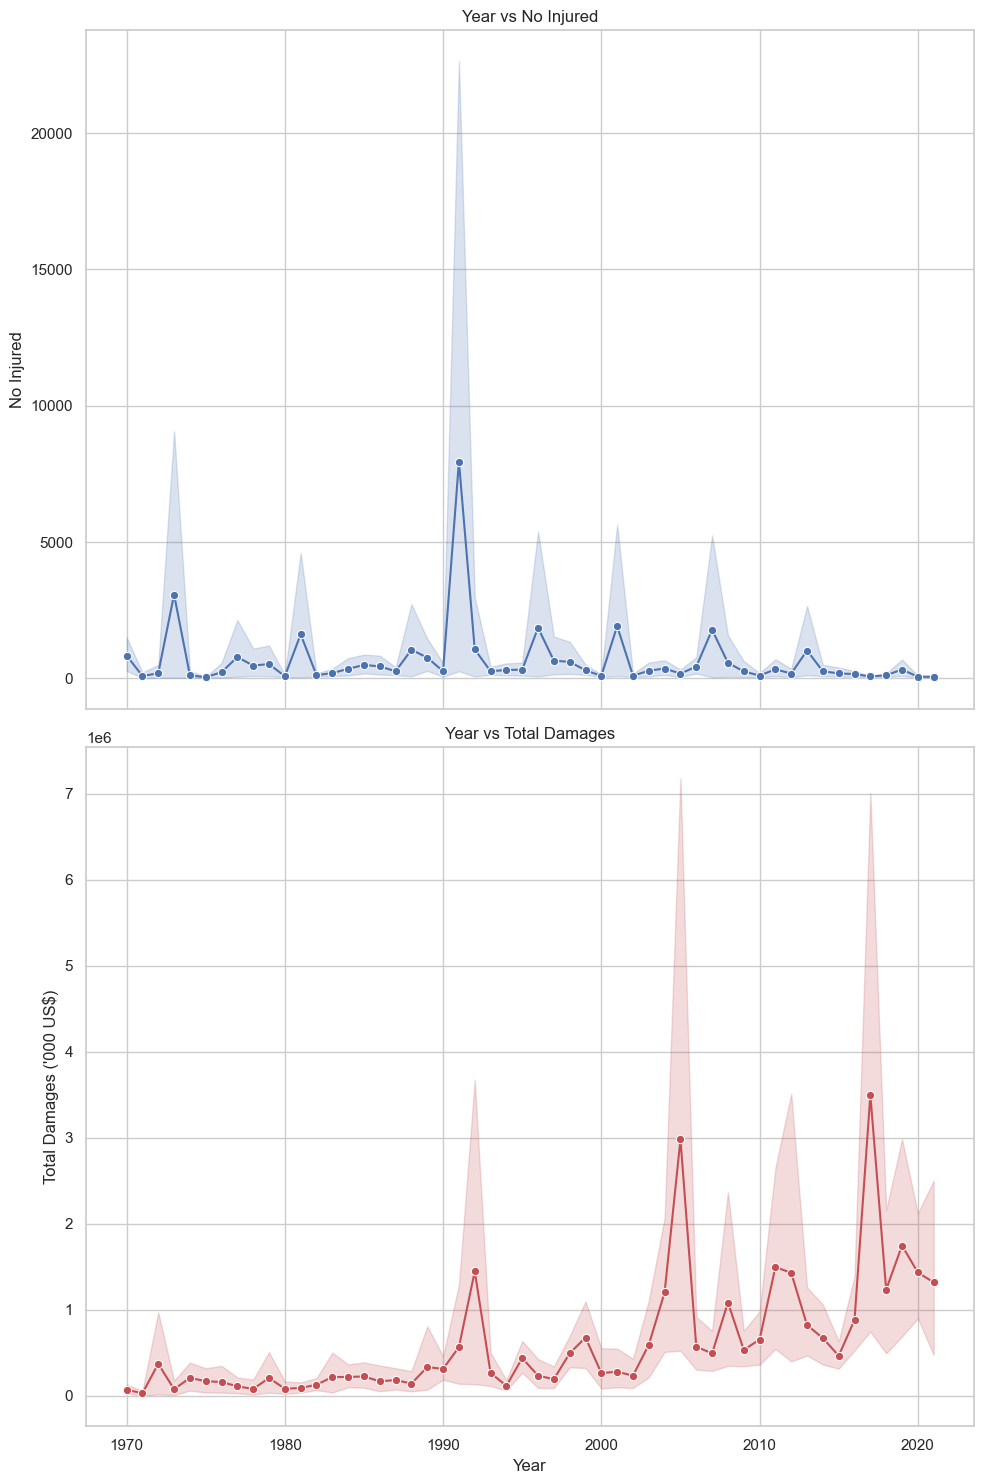

In [102]:
sns.set(style="whitegrid")

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15), sharex=True)

# Plot Year vs No Injured
sns.lineplot(x='Year', y='No Injured', data=ndraw, marker='o', color='b', ax=ax1)
ax1.set_title('Year vs No Injured')
ax1.set_ylabel('No Injured')

# Plot Year vs Total Damages
sns.lineplot(x='Year', y='Total Damages (\'000 US$)', data=ndraw, marker='o', color='r', ax=ax2)
ax2.set_title('Year vs Total Damages')
ax2.set_ylabel('Total Damages (\'000 US$)')



# Set common x-axis label
plt.xlabel('Year')

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()

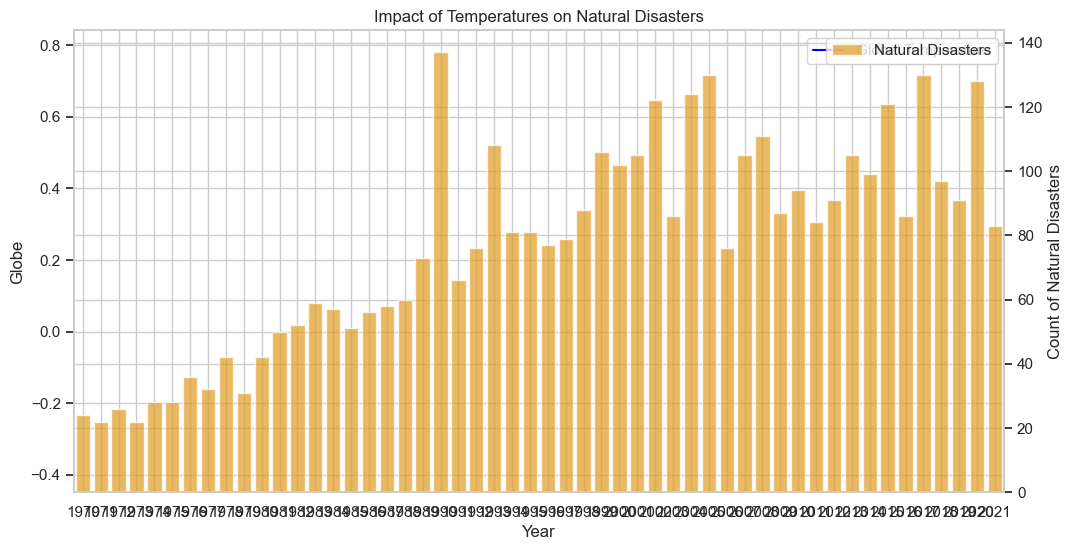

In [103]:
# Aggregate the counts of disasters per year
disaster_counts = ndraw.groupby('Year')['Disaster Group'].count().reset_index()

# Sample data and plotting
plt.figure(figsize=(12, 6))

# Plotting global temperatures
sns.lineplot(data=tempraw, x='Year', y='Globe', label='Global Temperature', color='blue')

# Creating a secondary y-axis for disaster counts
ax2 = plt.gca().twinx()
sns.barplot(data=disaster_counts, x='Year', y='Disaster Group', color='orange', alpha=0.7, ax=ax2, label='Natural Disasters')

plt.title('Impact of Temperatures on Natural Disasters')
plt.xlabel('Year')
plt.ylabel('Global Temperature (°C)')
ax2.set_ylabel('Count of Natural Disasters')
plt.xticks(rotation=-90)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1))

# Show the plot
plt.show()

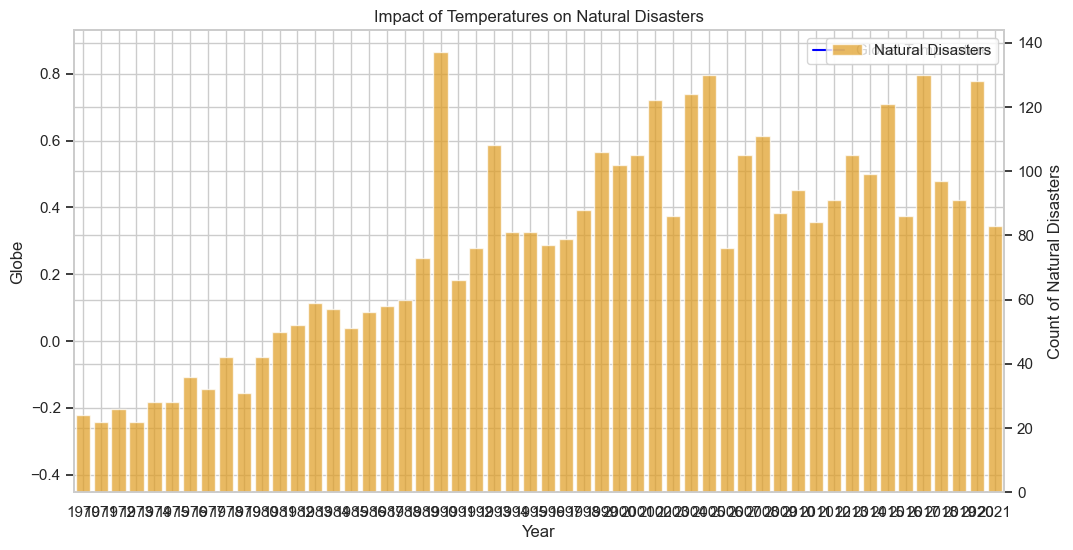

In [104]:
# Aggregate the counts of disasters per year
disaster_counts = ndraw.groupby('Year')['Disaster Group'].count().reset_index()

# Sample data and plotting
plt.figure(figsize=(12, 6))

# Plotting global temperatures
sns.lineplot(data=tempraw, x='Year', y='Globe', label='Global Temperature', color='blue')

# Creating a secondary y-axis for disaster counts
ax2 = plt.gca().twinx()
sns.barplot(data=disaster_counts, x='Year', y='Disaster Group', color='orange', alpha=0.7, ax=ax2, label='Natural Disasters')

plt.title('Impact of Temperatures on Natural Disasters')
plt.xlabel('Year')
plt.ylabel('Global Temperature (°C)')
ax2.set_ylabel('Count of Natural Disasters')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1))

# Show the plot
plt.show()

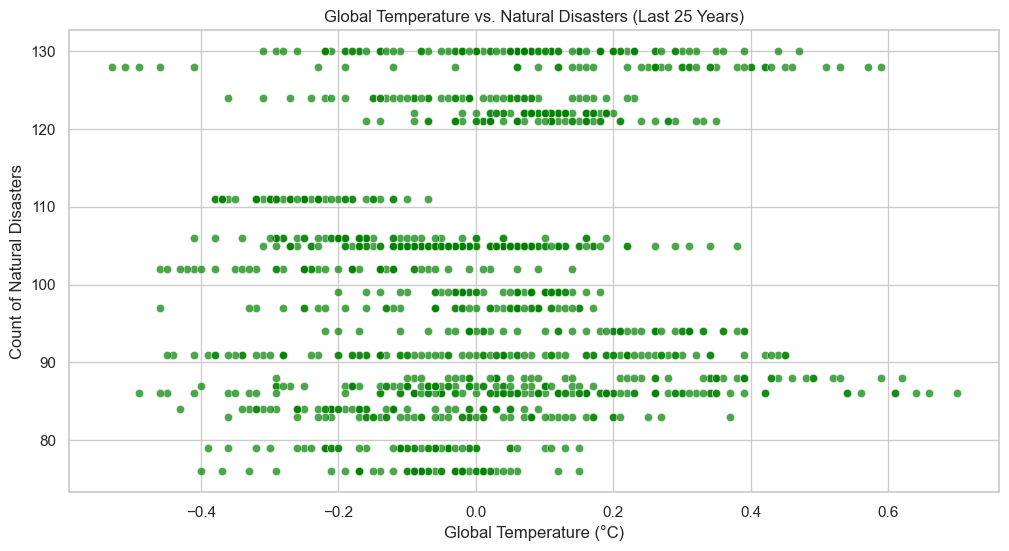

In [105]:
# Filter data for the last 25 years
tempraw_last_25 = tempraw[tempraw['Year'] >= tempraw['Year'].max() - 25]
disaster_counts_last_25 = ndraw[ndraw['Year'] >= ndraw['Year'].max() - 25].groupby('Year')['Disaster Group'].count().reset_index()

# Merge the temperature and disaster count data on the 'Year' column
merged_data_last_25 = pd.merge(tempraw_last_25, disaster_counts_last_25, on='Year', how='outer')

# Sample data and plotting
plt.figure(figsize=(12, 6))

# Scatter plot for Global Temperature vs. Natural Disasters (Last 25 Years)
sns.scatterplot(data=merged_data_last_25, x='Globe', y='Disaster Group', color='green', alpha=0.7)

plt.title('Global Temperature vs. Natural Disasters (Last 25 Years)')
plt.xlabel('Global Temperature (°C)')
plt.ylabel('Count of Natural Disasters')

# Show the plot
plt.show()

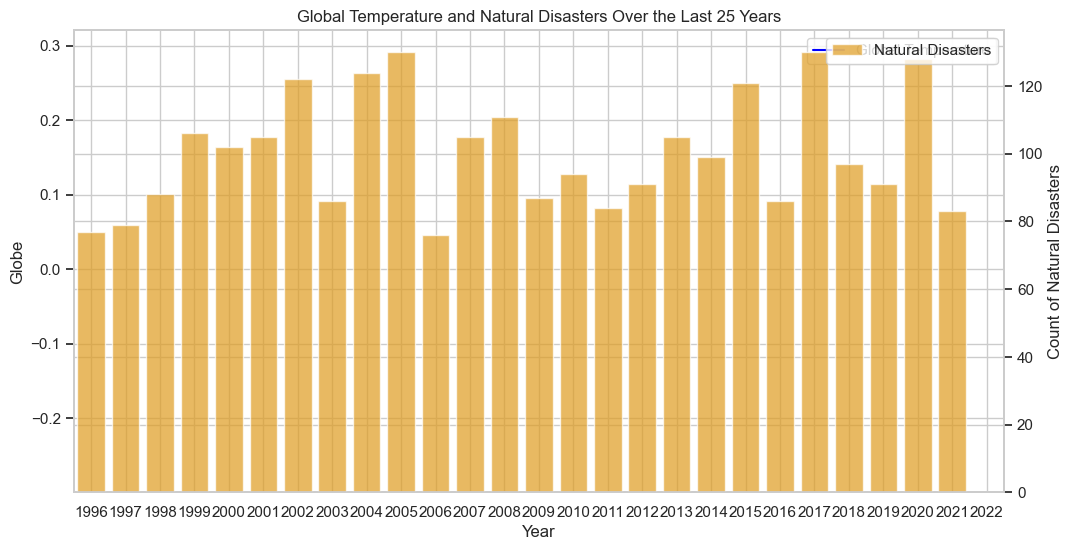

In [106]:
# Filter data for the last 25 years
tempraw_last_25 = tempraw[tempraw['Year'] >= tempraw['Year'].max() - 25]
disaster_counts_last_25 = ndraw[ndraw['Year'] >= ndraw['Year'].max() - 25].groupby('Year')['Disaster Group'].count().reset_index()

# Merge the temperature and disaster count data on the 'Year' column
merged_data_last_25 = pd.merge(tempraw_last_25, disaster_counts_last_25, on='Year', how='outer')

# Sample data and plotting
plt.figure(figsize=(12, 6))

# Line plot for Global Temperature (left y-axis)
sns.lineplot(data=merged_data_last_25, x='Year', y='Globe', label='Global Temperature', color='blue')

# Creating a secondary y-axis for disaster counts (right y-axis)
ax2 = plt.gca().twinx()
sns.barplot(data=merged_data_last_25, x='Year', y='Disaster Group', color='orange', alpha=0.7, ax=ax2, label='Natural Disasters')

plt.title('Global Temperature and Natural Disasters Over the Last 25 Years')
plt.xlabel('Year')
ax1.set_ylabel('Global Temperature (°C)')
ax2.set_ylabel('Count of Natural Disasters')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1))

# Show the plot
plt.show()

In [107]:
nd = ndraw[(ndraw['Year'] >= 1997) & (ndraw['Year'] <= 2022)]

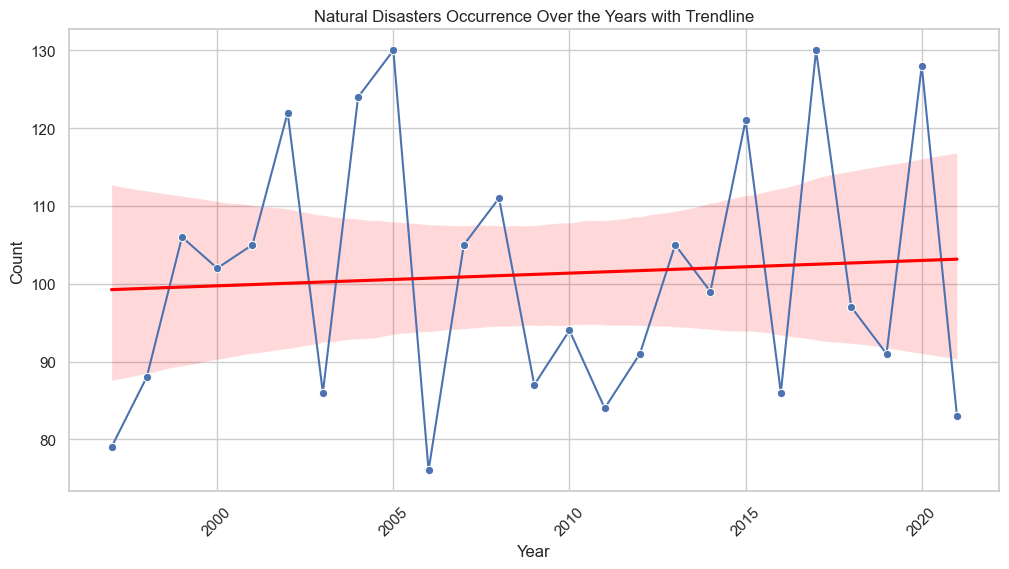

In [108]:
# Aggregate the counts of disasters per year
disaster_counts = nd.groupby('Year')['Disaster Group'].count().reset_index()

# Sample data and plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=disaster_counts, x='Year', y='Disaster Group', marker='o')
sns.regplot(data=disaster_counts, x='Year', y='Disaster Group', scatter=False, color='red')  # Add a trendline
plt.title('Natural Disasters Occurrence Over the Years with Trendline')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

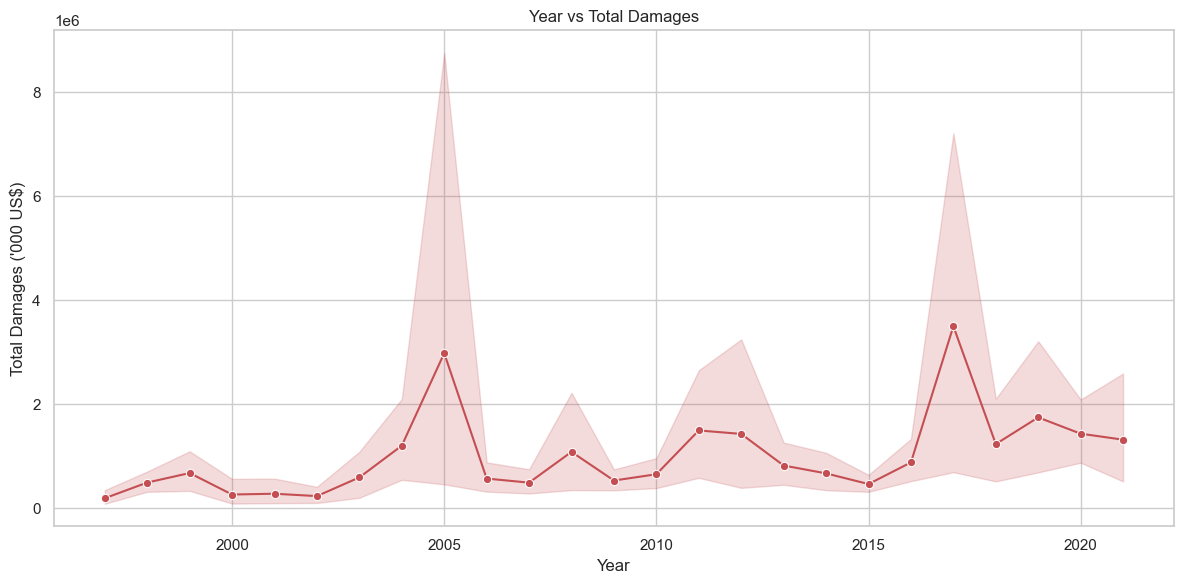

In [116]:
sns.set(style="whitegrid")

# Create subplots with shared x-axis
fig, (ax2) = plt.subplots(1, 1, figsize=(12, 6), sharex=True)

# # Plot Year vs No Injured
# sns.lineplot(x='Year', y='No Injured', data=nd, marker='o', color='b', ax=ax1)
# ax1.set_title('Year vs No Injured')
# ax1.set_ylabel('No Injured')

# Plot Year vs Total Damages
sns.lineplot(x='Year', y='Total Damages (\'000 US$)', data=nd, marker='o', color='r', ax=ax2)
ax2.set_title('Year vs Total Damages')
ax2.set_ylabel('Total Damages (\'000 US$)')



# Set common x-axis label
plt.xlabel('Year')

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()

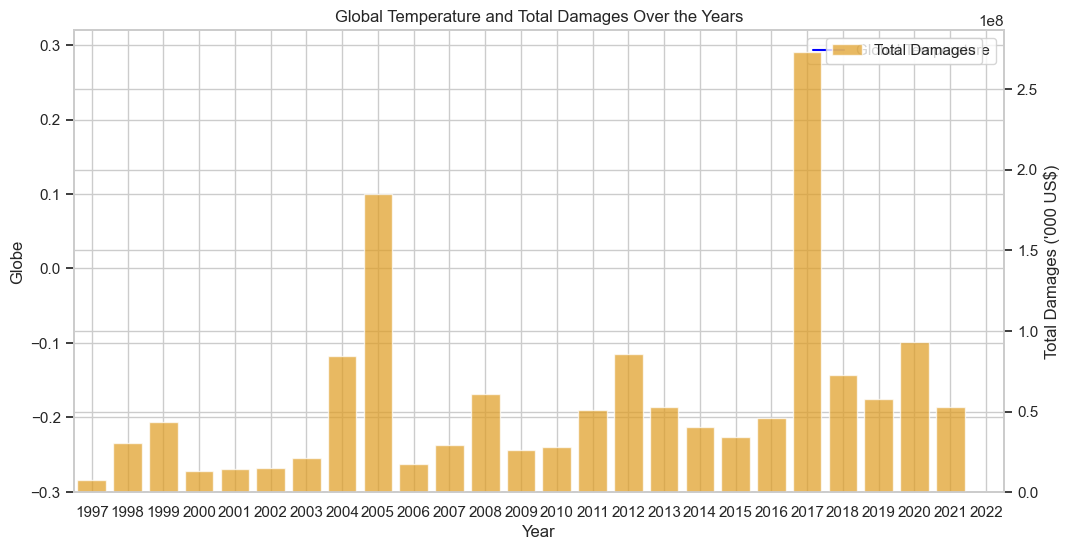

In [110]:
# Aggregate total damages from natural disasters per year
total_damages = nd.groupby('Year')['Total Damages (\'000 US$)'].sum().reset_index()

# Merge temperature and total damages data on the 'Year' column
merged_data = pd.merge(temp, total_damages, on='Year', how='outer')

# Sort the merged data by year
merged_data = merged_data.sort_values(by='Year')

# Sample data and plotting
plt.figure(figsize=(12, 6))

# Line plot for Global Temperature (left y-axis)
sns.lineplot(data=merged_data, x='Year', y='Globe', label='Global Temperature', color='blue')

# Creating a secondary y-axis for total damages (right y-axis)
ax2 = plt.gca().twinx()
sns.barplot(data=merged_data, x='Year', y='Total Damages (\'000 US$)', color='orange', alpha=0.7, ax=ax2, label='Total Damages')

plt.title('Global Temperature and Total Damages Over the Years')
plt.xlabel('Year')
ax1.set_ylabel('Global Temperature (°C)')
ax2.set_ylabel('Total Damages (\'000 US$)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1))

# Show the plot
plt.show()

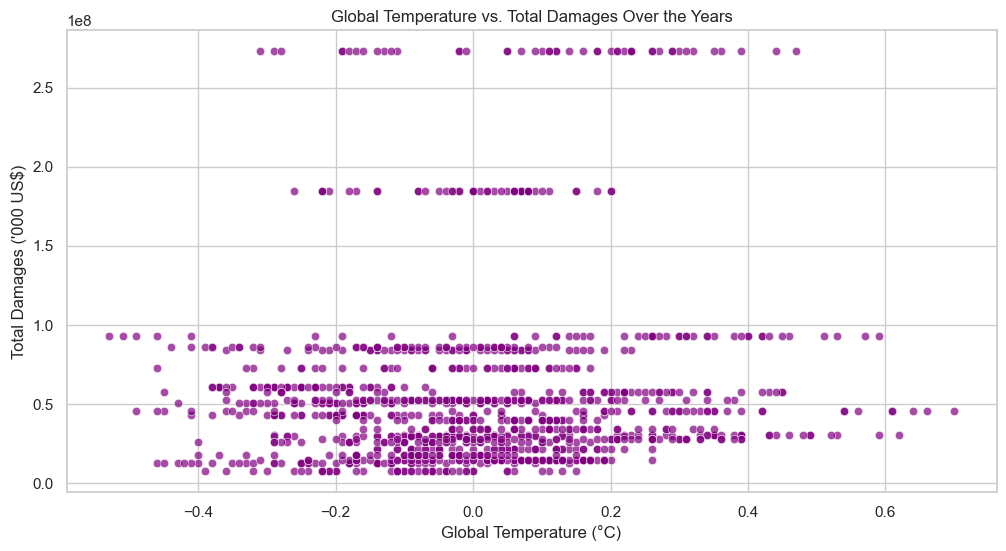

In [111]:
# Aggregate total damages from natural disasters per year
total_damages = nd.groupby('Year')['Total Damages (\'000 US$)'].sum().reset_index()

# Merge temperature and total damages data on the 'Year' column
merged_data = pd.merge(temp, total_damages, on='Year', how='outer')

# Sort the merged data by year
merged_data = merged_data.sort_values(by='Year')

# Sample data and plotting
plt.figure(figsize=(12, 6))

# Scatter plot for Global Temperature vs. Total Damages
sns.scatterplot(data=merged_data, x='Globe', y='Total Damages (\'000 US$)', color='purple', alpha=0.7)

plt.title('Global Temperature vs. Total Damages Over the Years')
plt.xlabel('Global Temperature (°C)')
plt.ylabel('Total Damages (\'000 US$)')

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

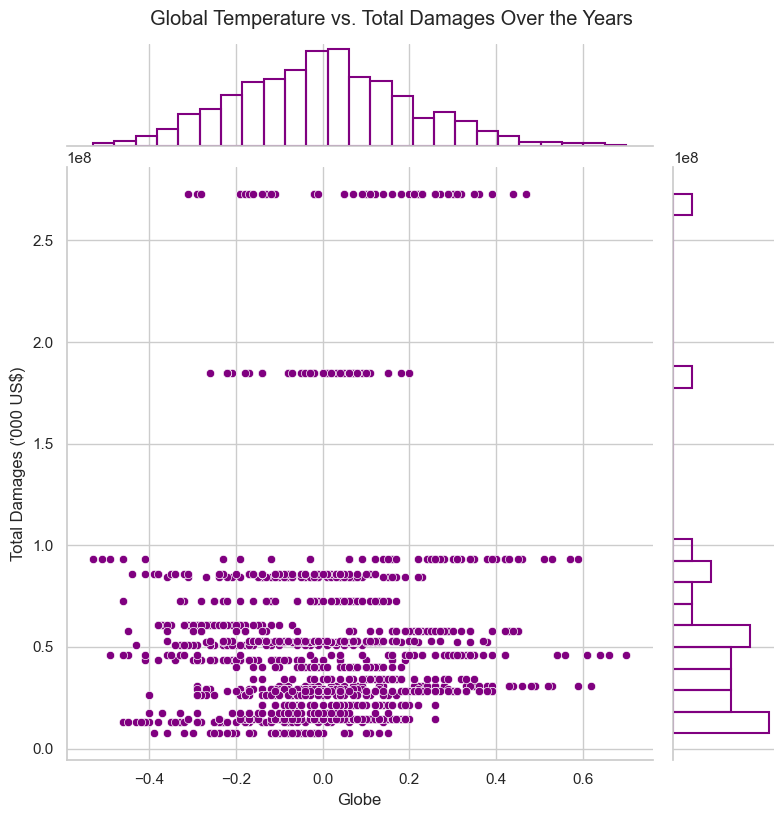

In [112]:
total_damages = nd.groupby('Year')['Total Damages (\'000 US$)'].sum().reset_index()

# Merge temperature and total damages data on the 'Year' column
merged_data = pd.merge(temp, total_damages, on='Year', how='outer')

# Sort the merged data by year
merged_data = merged_data.sort_values(by='Year')

# Sample data and plotting
plt.figure(figsize=(12, 8))

# Joint plot with marginal distributions
sns.jointplot(data=merged_data, x='Globe', y='Total Damages (\'000 US$)', kind='scatter', height=8, marginal_kws=dict(bins=25, fill=False), color='purple')

plt.suptitle('Global Temperature vs. Total Damages Over the Years', y=1.02)
plt.show()

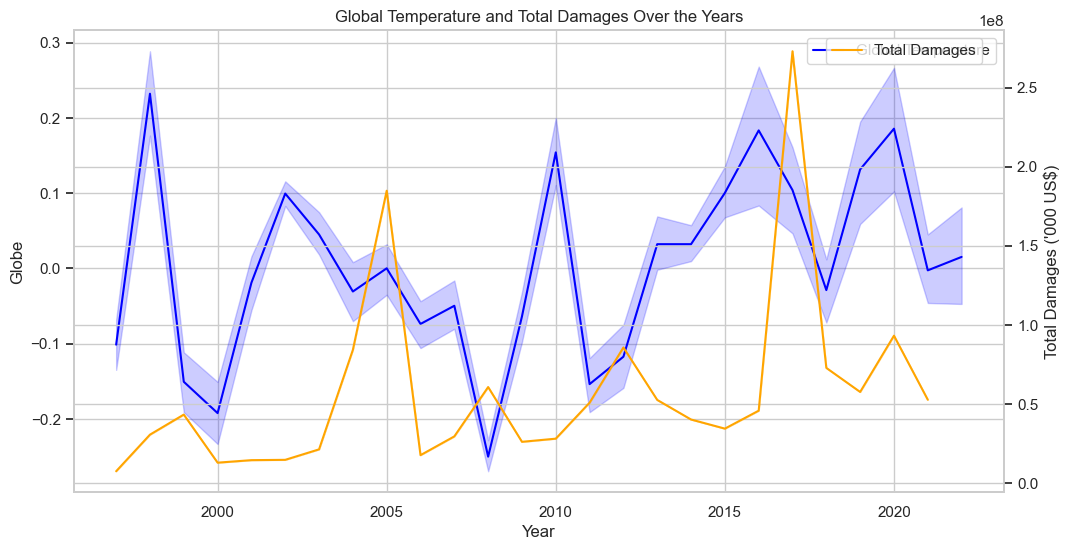

In [113]:
# Aggregate total damages from natural disasters per year
total_damages = nd.groupby('Year')['Total Damages (\'000 US$)'].sum().reset_index()

# Merge temperature and total damages data on the 'Year' column
merged_data = pd.merge(temp, total_damages, on='Year', how='outer')

# Sort the merged data by year
merged_data = merged_data.sort_values(by='Year')

# Sample data and plotting
plt.figure(figsize=(12, 6))

# Plotting global temperatures (left y-axis)
sns.lineplot(data=merged_data, x='Year', y='Globe', label='Global Temperature', color='blue')

# Creating a secondary y-axis for total damages (right y-axis)
ax2 = plt.gca().twinx()
sns.lineplot(data=merged_data, x='Year', y='Total Damages (\'000 US$)', label='Total Damages', color='orange', ax=ax2)

plt.title('Global Temperature and Total Damages Over the Years')
plt.xlabel('Year')
ax1.set_ylabel('Global Temperature (°C)')
ax2.set_ylabel('Total Damages (\'000 US$)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1))

# Show the plot
plt.show()

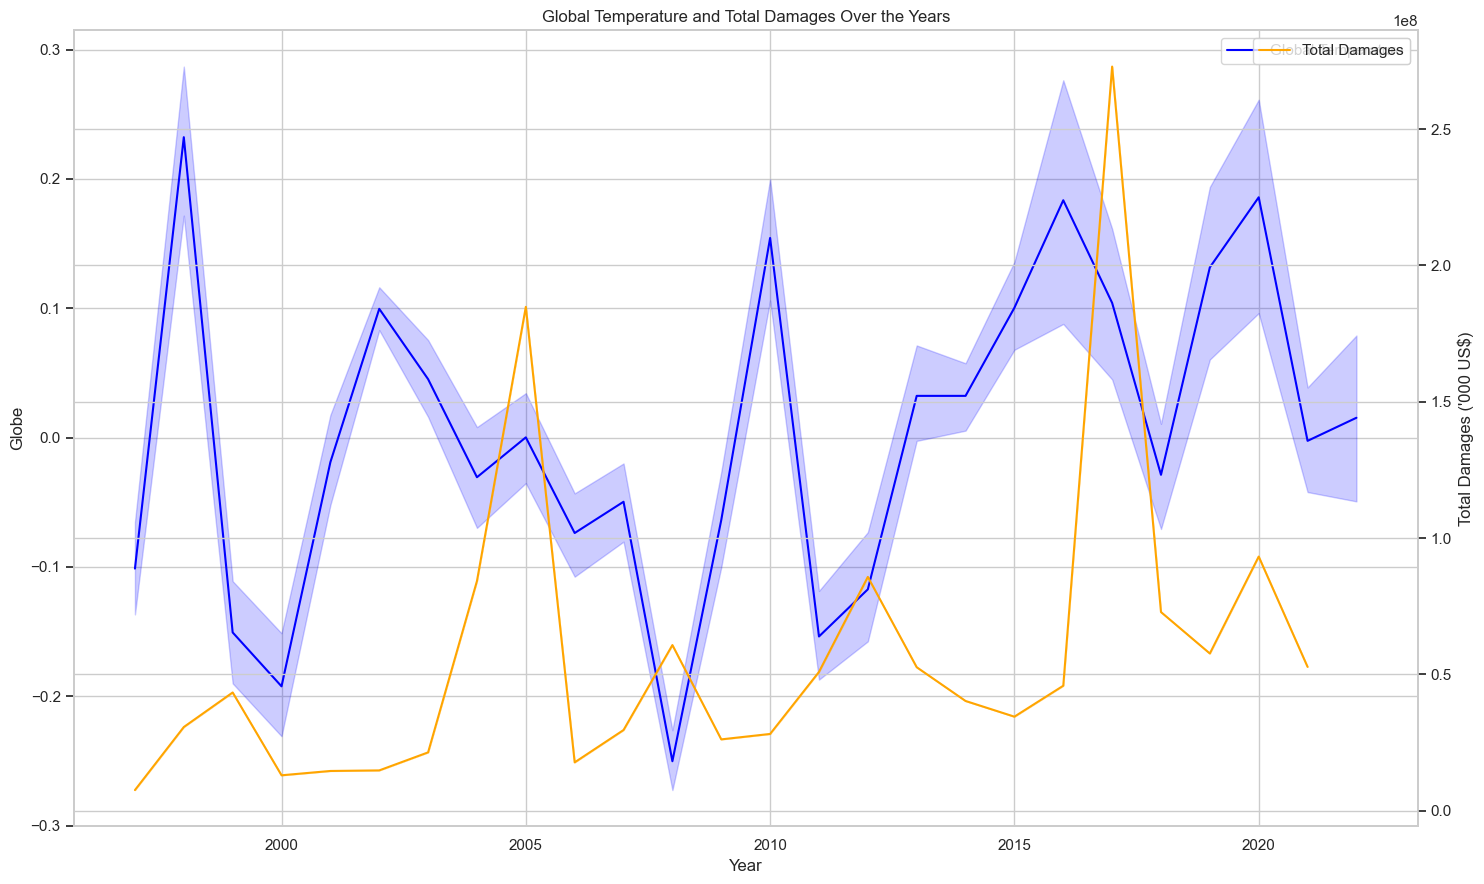

In [114]:
# Aggregate total damages from natural disasters per year
total_damages = nd.groupby('Year')['Total Damages (\'000 US$)'].sum().reset_index()

# Merge temperature and total damages data on the 'Year' column
merged_data = pd.merge(temp, total_damages, on='Year', how='outer')

# Sort the merged data by year
merged_data = merged_data.sort_values(by='Year')

# Sample data and plotting
plt.figure(figsize=(15, 9))

# Plotting global temperatures (left y-axis)
sns.lineplot(data=merged_data, x='Year', y='Globe', label='Global Temperature', color='blue')

# Creating a secondary y-axis for total damages (right y-axis)
ax2 = plt.gca().twinx()
sns.lineplot(data=merged_data, x='Year', y='Total Damages (\'000 US$)', label='Total Damages', color='orange', ax=ax2)

# Set the legends outside the plot
#ax1 = plt.gca()
#lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.8, 1))

plt.title('Global Temperature and Total Damages Over the Years')
plt.xlabel('Year')
plt.tight_layout()
#ax1.set_ylabel('Global Temperature (°C)')
#ax2.set_ylabel('Total Damages (\'000 US$)')
plt.xticks(rotation=45)

# Show the plot
plt.show()

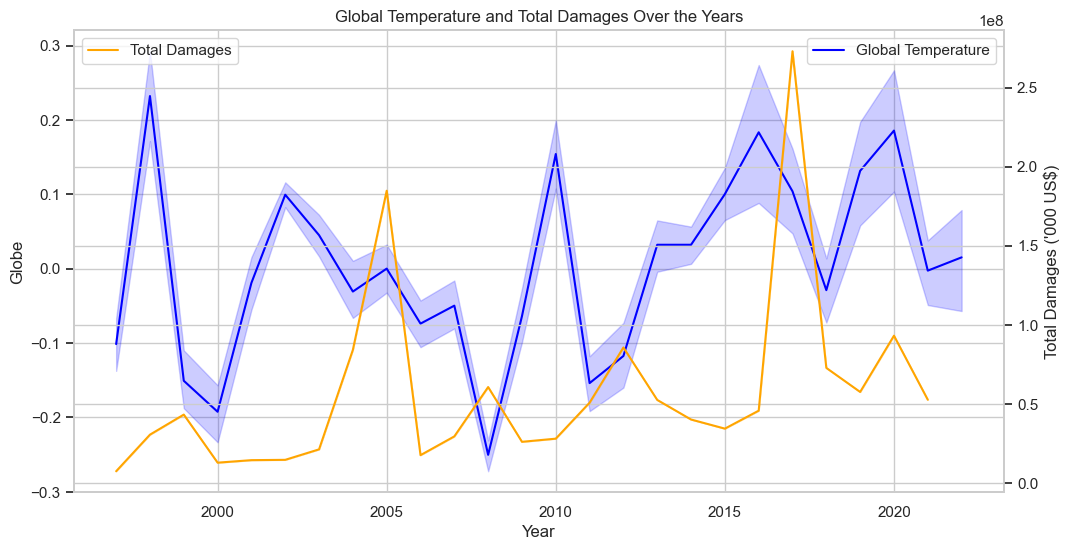

In [115]:
# Aggregate total damages from natural disasters per year
total_damages = nd.groupby('Year')['Total Damages (\'000 US$)'].sum().reset_index()

# Merge temperature and total damages data on the 'Year' column
merged_data = pd.merge(temp, total_damages, on='Year', how='outer')

# Sort the merged data by year
merged_data = merged_data.sort_values(by='Year')

# Sample data and plotting
plt.figure(figsize=(12, 6))

# Plotting global temperatures (left y-axis)
sns.lineplot(data=merged_data, x='Year', y='Globe', label='Global Temperature', color='blue')

# Creating a secondary y-axis for total damages (right y-axis)
ax2 = plt.gca().twinx()
sns.lineplot(data=merged_data, x='Year', y='Total Damages (\'000 US$)', label='Total Damages', color='orange', ax=ax2)

# Get handles and labels for the left y-axis only
lines, labels = plt.gca().get_legend_handles_labels()

# Display the legend for the left y-axis only
plt.legend(lines, labels, loc='upper left')

plt.title('Global Temperature and Total Damages Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Temperature (°C)')
ax2.set_ylabel('Total Damages (\'000 US$)')
plt.xticks(rotation=45)

# Show the plot
plt.show()